# Ch02 Dollar Run Bar(A233740

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

from adv_finance.bars import get_dollar_run_bars



In [2]:
%load_ext autoreload 
%autoreload 2

plt.style.use('seaborn-talk')
plt.style.use('bmh')
pd.set_option('display.max_rows', 100)


In [3]:
TRADE_A233740 = pd.read_parquet('/nfs/data/interim/TRADE_A233740.parq')
TRADE_A233740 = TRADE_A233740.set_index('TIMESTAMP')
TRADE_A233740_03 = TRADE_A233740.loc['2019-03']

In [4]:
df = TRADE_A233740_03

# 매일 09:01 ~ 15:20 사이에 체결 주문만 가져온다(동시호가 거래체결을 제거하기 위함)
list_df = []
for t in pd.date_range(df.index[0], df.index[-1], freq='D'): 
    date = f"{t.year}-{t.month}-{t.day}"
    tm_begin = f"{date} 09:01"
    tm_end = f"{date} 15:20"
    df0 = df.loc[tm_begin:tm_end]
    list_df.append(df0)
    
df = pd.concat(list_df)    

In [5]:
df = df.loc['2019-03-04']

In [33]:
%%time
df_bars, df_history = get_dollar_run_bars(df, 3, 50, True)
df_bars = df_bars.set_index('timestamp')
df_history = df_history.set_index('tm')

CPU times: user 315 ms, sys: 0 ns, total: 315 ms
Wall time: 314 ms


In [35]:
df_bars.shape

(102, 6)

In [10]:
# df_history = df_history[500:]

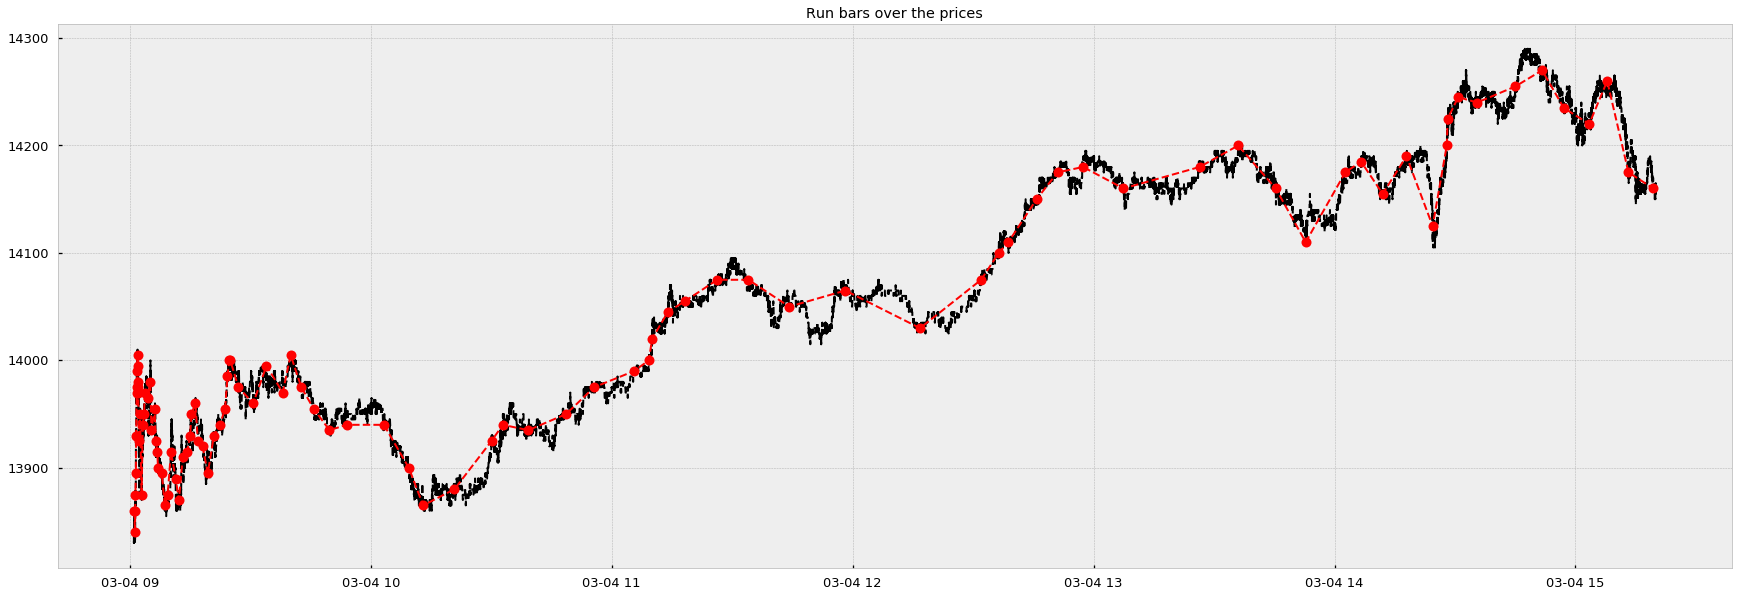

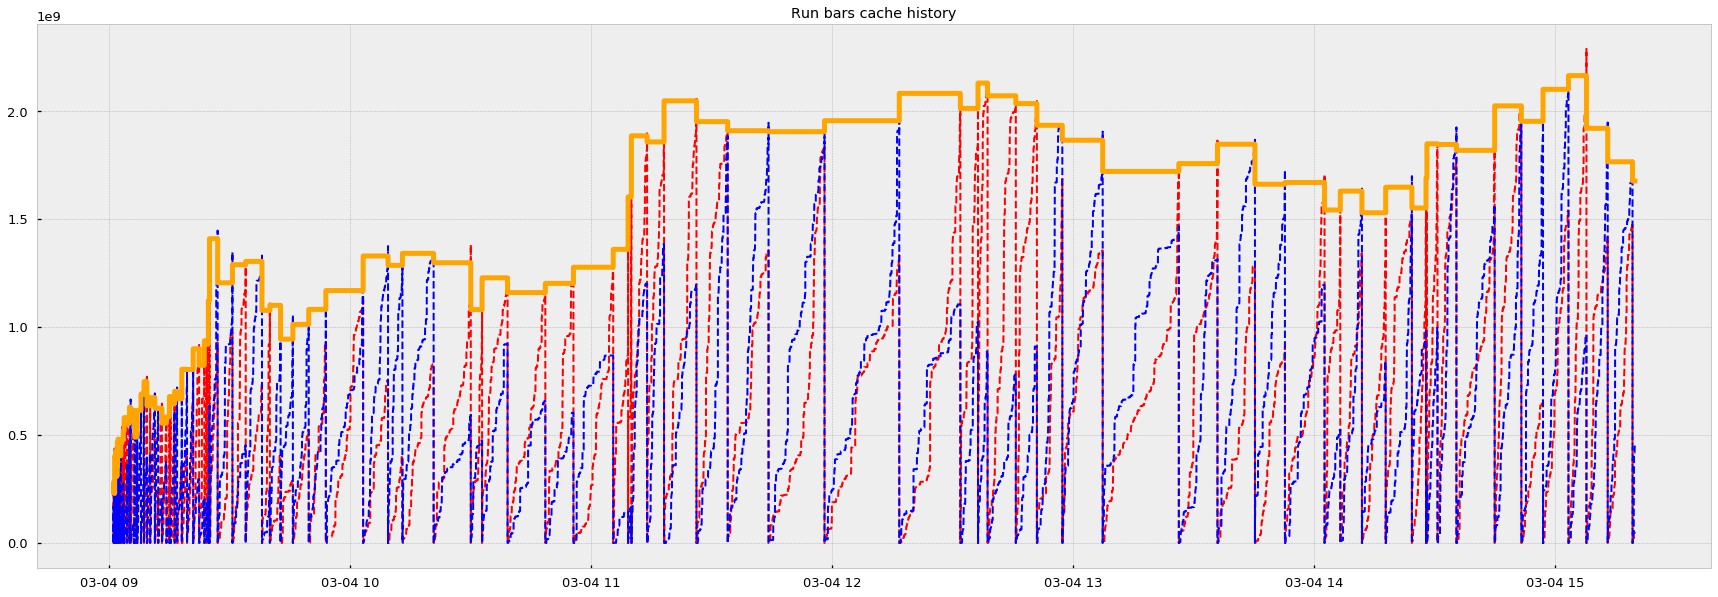

In [34]:
plt.figure(figsize=(30, 10))
plt.title('Run bars over the prices')
plt.plot(df.index.values, df.PRICE.values, label='raw_prices', ls='--', color='black')
plt.plot(df_bars.index.values, df_bars.close.values, label='run_bars', ls='--', markersize=10, marker='o', color='red')

plt.figure(figsize=(30, 10))
plt.title('Run bars cache history')
plt.plot(df_history.index.values, df_history.cum_theta_buy.values, label='cum_theta_buy', ls='--', color='red')
plt.plot(df_history.index.values, df_history.cum_theta_sell.values, label='cum_theta_sell', ls='--', color='blue')
plt.plot(df_history.index.values, df_history.threshold.values, label='threshold', color='orange', linewidth=5)
plt.show()